# Partial Sensing

# About this file

This file is to use the functionalities of the classes defined in the other file.

## Things to be done here

1) write algorithm for agent3, agent4 <br>
2) if object_matrix is knowledge base, then lets rename it to knowledge base to avoid confusion and have unambiguous variable names.<br>
3) Import A* code into this file.

## Things done here

1) declared the set of global variables required
2) renamed object_matrix to knowledge_base

In [1]:
from ipynb.fs.full.a_star import *
import numpy as np
from ipynb.fs.full.agent_6 import *

import random

In [2]:
maze_size = 10
probability = 0.3

global agent_gridworld
global helper_matrix
global full_grid_world_matrix
global visited_list
global number_of_bumps
global knowledge_base
global probability_matrix
global terrain_matrix

visited_list = []
infered_list = []
expression_list = []
number_of_bumps = 0
agent_gridworld = np.matrix(np.zeros((maze_size, maze_size)))
confirmed_path = [] #path that agent 3 has recognized
helper_matrix = np.full((maze_size, maze_size), 0)
probability_matrix = np.full((maze_size, maze_size), 0.0)
terrain_matrix = np.full((maze_size, maze_size), 0)
full_grid_world_matrix = np.full((maze_size, maze_size), 0)

# knowledge_base is used to store the inference/ knowledge base of objects(nodes) with it's respective indices
knowledge_base = np.array([agent_6(int(item/maze_size),item%maze_size,maze_size) for item in range(maze_size * maze_size)]).reshape(maze_size, maze_size)


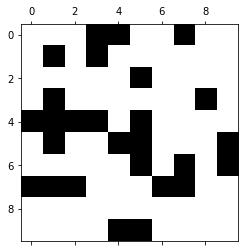

In [3]:
# full_grid_world_matrix = populateMatrix(maze_size, probability)

#### Use either the above line in the block or the below set of lines of code to get the full grid world

full_grid_world_matrix = [[0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]]

full_grid_world_matrix = np.matrix(full_grid_world_matrix)
plt.spy(full_grid_world_matrix)

In [4]:
def blockedNeighbors(n, row, col):
    
    global full_grid_world_matrix
    direction_list = [[-1, 0], [1, 0], [1, 1], [1, -1], [-1, -1], [-1, 1], [0, 1], [0, -1]]
    
    count = 0
    for direction in direction_list:
        row_new = row + direction[0]
        col_new = col + direction[1]
        if (row_new>=0 and row_new<=(n-1)) and (col_new>=0 and col_new<=(n-1)):
            if full_grid_world_matrix[row_new, col_new] == 1:
                count += 1
    return count

def initialize_helper_matrix(n):
    dir = [[-1, 0], [1, 0], [1, 1], [1, -1], [-1, -1], [-1, 1], [0, 1], [0, -1]]
    global helper_matrix
    for x in range(n):
        for y in range(n):
            count = blockedNeighbors(n, x, y)
            helper_matrix[x][y] = count


In [5]:
def initialize_terrain_matrix(maze_size):
    n = 10
    p = 1

    # generates number between 0-2
    np_array = np.random.randint(3, size=100)

    block = lambda x: 2 if x>p else (1 if x<p else 0)
    vectorized_block = np.vectorize(block)

    np_array = vectorized_block(np_array).reshape(n,n)
    terrain_matrix = np.asmatrix(np_array)

    return terrain_matrix

In [6]:
def initialize_all_matrices(maze_size):
    global knowledge_base
    initialize_helper_matrix(maze_size)
    # initializing getNx
    for i in range(maze_size):
        for j in range(maze_size):
            knowledge_base[i][j].Nx = getNx(i, j, maze_size)
            knowledge_base[i][j].Cx = helper_matrix[i][j]
            
    terrain_matrix = initialize_terrain_matrix(maze_size)

In [7]:
def get_agent_gridworld_from_knowledge_base(object_matrix):
    global maze_size

    agent_gridworld = np.zeros((maze_size, maze_size))
    for i in range(maze_size):
        for j in range(maze_size):
            if object_matrix.item((i,j)).blocked == 1:
                agent_gridworld[i][j] = 1
    return agent_gridworld

In [8]:
def getNx(row, col, n):
    if (row ==0  and col == 0) or (row == 0 and col == n-1) or (row==n-1 and col==0) or (row ==n-1 and col==n-1):
        return 3
    
    elif row == 0 or col == 0 or col == n-1 or row == n-1:
        return 5
    else:
        return 8

In [9]:
def get_neighbors(row, col, n):
    #top left node
    if (row ==0  and col == 0) :
        return [(row+1, col), (row, col+1), (row+1, col+1)]
    
    #top right node
    elif (row == 0 and col == n-1):
        return [(row, col-1), (row+1, col), (row+1, col-1)]
    
    #bottom left node
    elif (row==n-1 and col==0):
        return [(row-1, col), (row, col+1), (row-1, col+1)]
    
    #bottom right node
    elif (row ==n-1 and col==n-1):
        return [(row-1, col-1), (row, col-1), (row-1, col-1)]

    # top edge nodes
    elif row == 0:
        return [(row, col-1), (row+1, col-1), (row+1, col), (row+1, col+1), (row, col+1)]
    
    # bottom edge nodes
    elif row == n-1:
        return [(row, col-1), (row-1, col-1), (row-1, col), (row-1, col+1), (row, col+1)]
    
    # left edge nodes
    elif col == 0:
        return [(row-1, col), (row-1, col+1), (row, col+1), (row+1, col+1), (row+1, col)]
    
    # right edge nodes
    elif col == n-1:
        return [(row-1, col), (row-1, col-1), (row, col-1), (row+1, col-1), (row+1, col)]
    else:
        return [(row-1, col-1), (row, col-1), (row+1, col-1), (row+1, col), (row+1, col+1),\
               (row, col+1), (row-1, col+1), (row-1, col)]
    


# Code for Agent 6 goes here

In [10]:
def agent6(maze_size, source): # using this name for the lack of a better name. please change.
    global visited_list
    global number_of_bumps
    global knowledge_base
    global agent_gridworld
    global full_grid_world_matrix
    global confirmed_path
    global infered_list
    global expression_list
    global number_of_bumps
    global confirmed_path

    _,_,_,path = astar(source,agent_gridworld)
    path = path[::-1]
    print('path', path)
    goal_reached = False

    if path == []:
        return visited_list, number_of_bumps, infered_list, goal_reached

    for node in path:
        row = node[0]
        column = node[1]
        knowledge_base[row][column].blocked = helper_matrix[row][col]

In [11]:
def normalize_probabilities(node, updated_probability_of_current_node):
    sum_of_probabilities = 0
    for row in range(maze_size):
        for col in range(maze_size):
            if row == node[0] and col == node[1]:
                continue
            else:
                sum_of_probabilities += probability_matrix[row][col]
    print("sum_of_probabilities", sum_of_probabilities)
    Total_probability = updated_probability_of_current_node + sum_of_probabilities
    print('Total_probability', Total_probability)
    
    updated_probability_of_current_node = updated_probability_of_current_node/Total_probability

    for row in range(maze_size):
        for col in range(maze_size):
            if row == node[0] and col == node[1]:
                probability_matrix[row][col] = updated_probability_of_current_node
            else:
                probability_matrix[row][col] = probability_matrix[row][col] / Total_probability
    
    # verifying total probability = 1
    sum_of_probabilities = 0
    for row in range(maze_size):
        for col in range(maze_size):
            sum_of_probabilities += probability_matrix[row][col]
    print("sum_of_probabilities", sum_of_probabilities)

# Main function

In [12]:
if __name__ == "__main__":
    initialize_all_matrices(maze_size)

    # initializing a random target
    target_row = random.randint(0, maze_size-1)
    target_col = random.randint(0, maze_size-1)
    print(target_row, target_col)
    full_grid_world_matrix.itemset((target_row, target_col), 99)
    
#     full_grid_world_matrix[target_row][target_col] = 99

    terrain_matrix = initialize_terrain_matrix(10)
    terrain_list = ['flat', 'hilly', 'forest']
    false_negative_rates = [0.2, 0.5, 0.8]

    terrain_matrix = [[1, 0, 0, 1, 1, 0, 2, 2, 0, 2],
        [0, 1, 2, 2, 2, 2, 2, 0, 1, 2],
        [0, 2, 2, 2, 2, 2, 1, 2, 1, 0],
        [1, 2, 2, 1, 2, 1, 1, 2, 0, 0],
        [1, 1, 2, 0, 1, 1, 0, 0, 0, 2],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
        [1, 0, 2, 2, 1, 0, 2, 2, 2, 0],
        [1, 0, 1, 0, 0, 1, 1, 1, 2, 1],
        [1, 2, 2, 0, 2, 2, 0, 0, 1, 2],
        [2, 2, 1, 1, 0, 0, 0, 0, 0, 0]]
    terrain_matrix = np.matrix(terrain_matrix)

    
    initial_probability = 1/(maze_size * maze_size)
    
    for row in range(len(knowledge_base)):
        for col in range(len(knowledge_base)):
            probability_matrix[row][col] = float(initial_probability)

    path = [(0,0), (0,1)]

    for node in path:
        row = node[0]
        col = node[1]

        terrain_index = terrain_matrix[node]
        terrain_type = terrain_list[terrain_index]
        false_negative_rate = false_negative_rates[terrain_index]

        print(terrain_type)

        if full_grid_world_matrix[node] == 0:
            print('free')
            previous_probability_of_current_node = probability_matrix[row][col]
            updated_probability_of_current_node = false_negative_rate * previous_probability_of_current_node
            print('previous_probability_of_current_node', previous_probability_of_current_node)
            print("updated_probability_of_current_node", updated_probability_of_current_node)
            
            normalize_probabilities(node, updated_probability_of_current_node)
            print(probability_matrix)
        elif full_grid_world_matrix[node] == 1:
            print('blocked')
        elif full_grid_world_matrix[node] == 999:
            print("Target found")
            break

1 3
hilly
free
previous_probability_of_current_node 0.01
updated_probability_of_current_node 0.005
sum_of_probabilities 0.9900000000000007
Total_probability 0.9950000000000007
sum_of_probabilities 1.0000000000000016
[[0.00502513 0.01005025 0.01005025 0.01005025 0.01005025 0.01005025
  0.01005025 0.01005025 0.01005025 0.01005025]
 [0.01005025 0.01005025 0.01005025 0.01005025 0.01005025 0.01005025
  0.01005025 0.01005025 0.01005025 0.01005025]
 [0.01005025 0.01005025 0.01005025 0.01005025 0.01005025 0.01005025
  0.01005025 0.01005025 0.01005025 0.01005025]
 [0.01005025 0.01005025 0.01005025 0.01005025 0.01005025 0.01005025
  0.01005025 0.01005025 0.01005025 0.01005025]
 [0.01005025 0.01005025 0.01005025 0.01005025 0.01005025 0.01005025
  0.01005025 0.01005025 0.01005025 0.01005025]
 [0.01005025 0.01005025 0.01005025 0.01005025 0.01005025 0.01005025
  0.01005025 0.01005025 0.01005025 0.01005025]
 [0.01005025 0.01005025 0.01005025 0.01005025 0.01005025 0.01005025
  0.01005025 0.01005025 0.

Test